# Real-world Data Wrangling - (Movies & TV Shows of Netflix & Amazon Prime)

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:* In this project, I will assess, clean, combine and store two datasets of Movies and TV Shows for Netflix and Amazon Prime and answer some intersting questions.


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**
The dataset is about Netflix movies and tv shows.

Type: (CSV file)

Method: (The data was gatherd using API from kaggle website)

Reason of choose the method: I chose to use the Kaggle API for gathering the data because it offers automated downloading,  programmatic access, community collaboration, and enhanced security, streamlining the data acquisition process efficiently.

Dataset variables:

* show_id: ID for movie / tv show
* type: movie / tv show
* title: Title of the movie / tv show
* director: Director of the movie / tv show
* cast: Names of the cast for the movie / tv show
* country: The production country of the movie / tv show 
* date_added: The date of adding the movie / tv show into Netflix
* release_year: The year of relasing the movie / tv show
* rating: Rating of the movie / tv show
* duration: Duration of the movie / tv show
* listed_in: Category of the movie / tv show
* description: Description of the movie / tv show

Source: https://www.kaggle.com/datasets/shivamb/netflix-shows/data

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import kaggle
import os
import matplotlib.pyplot as plt

In [2]:
# create directory
folder = "Datasets"
if not os.path.exists(folder):
    os.makedirs(folder)

# get the current working directory
directory = os.getcwd()

# join the directory and the datasets folder
file_path = os.path.join(directory, folder)

In [3]:
#FILL IN 1st data gathering and loading method

# authenticate with the kaggle API
kaggle.api.authenticate()

# define the path where the dataset will be downloaded and extracted
file_path = "Datasets"

# download and extract the dataset from kaggle using the dataset's identifier
kaggle.api.dataset_download_files("shivamb/netflix-shows", path=file_path, unzip=True)

# read the CSV file into a pandas dataframe
df_netflix = pd.read_csv("Datasets/netflix_titles.csv")

#### Dataset 2
The dataset is about the movies / tv shows of Amazon Prime

Type: (CSV File)

Method: Download it manually from kaggle website

Reason of choose the  method: Simple and clear

Dataset variables:

* show_id: ID for movie / tv show
* type: movie / tv show
* title: Title of the movie / tv show
* director: Director of the movie / tv show
* cast: Names of the cast for the movie / tv show
* country: The production country of the movie / tv show 
* date_added: The date of adding the movie / tv show into Amazon Prime
* release_year: The year of relasing the movie / tv show
* rating: Rating of the movie / tv show
* duration: Duration of the movie / tv show
* listed_in: Category of the movie / tv show
* description: Description of the movie / tv show

Source: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

In [4]:
#FILL IN 2nd data gathering and loading method

# read the csv file
df_amazon_prime = pd.read_csv('amazon_prime_titles.csv')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing Values in both datasets

In [5]:
#FILL IN - Inspecting the dataframe visually
# Netflix dataset - first 5 rwos
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#FILL IN - Inspecting the dataframe visually
# Amazon Prime dataset - first 5 rwos
df_amazon_prime.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [7]:
#FILL IN - Inspecting the dataframe programmatically
# Netflix dataset info
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#FILL IN - Inspecting the dataframe programmatically
# Amazon Prime dataset info
df_amazon_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


Issue and justification: The first quality issue is both datasets contains missing values**

**The Netflix dataset's columns:** *director, cast, country, date_added, rating and duration* have missing values as shown above.

**The Amazon Prime dataset's columns:** *director, cast, country, date_added and rating* have missing values as shown above.

I will leave director's missing values as it is because the high count of missing values and the importance of the column.

The columns "cast" and "country" in both datasets will be dropped because of thier useless.

The column "date_added" will be even dropped after correcting it's data type in both datasets.

The column "rating" is going to be dropped it's mssing values in both datasets.

The column "duration" in Netflix dataset have some missing values and it is going to be dropped.

### Quality Issue 2: Wrong data type in 'type'

In [9]:
#FILL IN - Inspecting the dataframe visually
df_netflix['type'].head()

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object

In [10]:
#FILL IN - Inspecting the dataframe visually
df_amazon_prime['type'].head(20)

0       Movie
1       Movie
2       Movie
3       Movie
4       Movie
5       Movie
6       Movie
7       Movie
8       Movie
9       Movie
10      Movie
11      Movie
12      Movie
13      Movie
14      Movie
15      Movie
16      Movie
17    TV Show
18    TV Show
19      Movie
Name: type, dtype: object

In [11]:
#FILL IN - Inspecting the dataframe programmatically
# we can see here that there are only two types which are movie / tv show
# and the type of this column is object, it need to be category instead
df_netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
#FILL IN - Inspecting the dataframe programmatically
df_netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [13]:
# the same issue here in Amazon Prime dataset
df_amazon_prime['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [14]:
df_amazon_prime['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Issue and justification: The second quality issue is the column 'type' is in wrong data type in both datasets.

It only has two values (Movie) and (TV Show), so we will convert it's type into category

### Quality Issue 3: Wrong data type in 'date_added'

In [15]:
#FILL IN - Inspecting the dataframe visually
# the variables stored as in date format, but the actual type is object which must changed
df_netflix['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [16]:
#FILL IN - Inspecting the dataframe visually
# the same issue here
df_amazon_prime['date_added'].head()

0    March 30, 2021
1    March 30, 2021
2    March 30, 2021
3    March 30, 2021
4    March 30, 2021
Name: date_added, dtype: object

In [17]:
#FILL IN - Inspecting the dataframe programmatically
df_netflix['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8807 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype 
--------------  ----- 
8797 non-null   object
dtypes: object(1)
memory usage: 68.9+ KB


In [18]:
#FILL IN - Inspecting the dataframe programmatically
df_amazon_prime['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9668 entries, 0 to 9667
Series name: date_added
Non-Null Count  Dtype 
--------------  ----- 
155 non-null    object
dtypes: object(1)
memory usage: 75.7+ KB


Issue and justification: The issue here is about wrong data type in 'date_added' column in both datasets.

The variable's data type should be in datetime format instead of object

### Tidiness Issue 1: Multiple variables stored in 'duration'

In [19]:
#FILL IN - Inspecting the dataframe visually
df_netflix['duration'].head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [20]:
#FILL IN - Inspecting the dataframe visually
df_amazon_prime['duration'].head(20)

0      113 min
1      110 min
2       74 min
3       69 min
4       45 min
5       52 min
6       98 min
7      131 min
8       87 min
9       92 min
10      88 min
11      93 min
12      94 min
13      46 min
14      74 min
15      96 min
16      87 min
17    1 Season
18    1 Season
19     104 min
Name: duration, dtype: object

In [21]:
#FILL IN - Inspecting the dataframe programmatically
# as we can see here, too much variables stored in one column according to 'type' column
# these variables should be stored in different two columns
df_netflix['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [22]:
#FILL IN - Inspecting the dataframe programmatically
# as we can see here, too much variables stored in one column according to 'type' column
# these variables should be stored in different two columns
df_amazon_prime['duration'].value_counts()

duration
1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
21 Seasons       1
485 min          1
550 min          1
181 min          1
191 min          1
Name: count, Length: 219, dtype: int64

Issue and justification: In the column 'duration' there two kind of variables, if the type is movie then the duration will be in minutes, and if the type is tv show the duration will be in seasons.

There should be two columns 'movie_duration' and 'show_seasons' to handle each kind of variables.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [23]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_netflix_cleaned = df_netflix.copy()
df_amazon_prime_cleaned = df_amazon_prime.copy()

### **Quality Issue 1: Missing Values in both datasets**

In [24]:
# FILL IN - Apply the cleaning strategy - Netflix dataset
# drop the 'cast' and 'country' columns from df_netflix_cleaned
df_netflix_cleaned.drop(['cast', 'country'], axis=1, inplace=True)

# drop missing values in the 'rating' column of df_netflix_cleaned
df_netflix_cleaned = df_netflix_cleaned.dropna(subset=['rating'])

# drop missing values in the 'rating' column of df_netflix_cleaned
df_netflix_cleaned = df_netflix_cleaned.dropna(subset=['duration'])

In [25]:
# FILL IN - Validate the cleaning was successful - Netflix dataset
# check if 'cast' and 'country' is successfuly dropped 
df_netflix_cleaned.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
# FILL IN - Validate the cleaning was successful - Netflix dataset
# check if 'rating' has NaN values or not
print('rating missing values:')
sum(df_netflix_cleaned['rating'].isnull())

rating missing values:


0

In [27]:
# FILL IN - Validate the cleaning was successful - Netflix dataset
# check if 'duration' has missing values or not
print('duration missing values:')
sum(df_netflix_cleaned['duration'].isnull())

duration missing values:


0

In [28]:
# check the shape after this step
df_netflix_cleaned.shape

(8800, 10)

In [29]:
# FILL IN - Apply the cleaning strategy - Amazon Prime dataset
# Applying the same step for 'cast' and 'country' columns
df_amazon_prime_cleaned.drop(['cast', 'country'], axis=1, inplace=True)

# drop missing values in the 'rating' column of df_amazon_prime_cleaned
df_amazon_prime_cleaned = df_amazon_prime_cleaned.dropna(subset=['rating'])

In [30]:
# FILL IN - Validate the cleaning was successful - Amazon Prime dataset
# check if 'cast' and 'country' is dropped
df_amazon_prime_cleaned.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Take Care Good Night,Girish Joshi,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
16,s17,Movie,Zoombies,Glenn Miller,NaN,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
17,s18,TV Show,Zoo Babies,NaN,NaN,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,NaN,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
19,s20,Movie,Zoe,Drake Doremus,NaN,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...


In [31]:
# FILL IN - Validate the cleaning was successful - Amazon Prime dataset
# check if 'rating' has missing values or not
print('rating missing values:')
sum(df_amazon_prime_cleaned['rating'].isnull())

rating missing values:


0

In [32]:
# check the shape after this step
df_amazon_prime_cleaned.shape

(9331, 10)

Justification: Dealing with missing values in both datasets and drop two useless columns

### **Quality Issue 2: Wrong data type in 'type'**

In [33]:
#FILL IN - Apply the cleaning strategy -- Netflix 
# Convert 'type' column to category
df_netflix_cleaned['type'] = df_netflix_cleaned['type'].astype('category')

In [34]:
#FILL IN - Validate the cleaning was successful
df_netflix_cleaned['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

In [35]:
#FILL IN - Apply the cleaning strategy -- Amazon Prime
# Convert 'type' column to category
df_amazon_prime_cleaned['type'] = df_amazon_prime_cleaned['type'].astype('category')

In [36]:
#FILL IN - Validate the cleaning was successful
df_amazon_prime_cleaned['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

Justification: convert the column 'type' format from object into category in both datasets

### **Quality Issue 3: Wrong data type in 'date_addedd'**

In [37]:
#FILL IN - Apply the cleaning strategy -- Netflix
# cannot change the format untill removing white spaces from the column using .strip()
df_netflix_cleaned['date_added'] = df_netflix_cleaned['date_added'].str.strip()

# change the format 
df_netflix_cleaned['date_added'] = pd.to_datetime(df_netflix_cleaned['date_added'])

In [38]:
#FILL IN - Validate the cleaning was successful -- Netflix
# check if it changed or not
df_netflix_cleaned.dtypes

show_id                 object
type                  category
title                   object
director                object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [39]:
#FILL IN - Apply the cleaning strategy -- Amazon Prime
# cannot change the format untill removing white spaces from the column using .strip()
df_amazon_prime_cleaned['date_added'] = df_amazon_prime_cleaned['date_added'].str.strip()

# change the format 
df_amazon_prime_cleaned['date_added'] = pd.to_datetime(df_amazon_prime_cleaned['date_added'])

In [40]:
#FILL IN - Validate the cleaning was successful -- Netflix
# check if it changed or not
df_amazon_prime_cleaned.dtypes

show_id                 object
type                  category
title                   object
director                object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Justification: convert 'date_added' format into datetime in both datasets

### **Tidiness Issue 1: Multiple variables stored in 'duration'**

In [41]:
#FILL IN - Apply the cleaning strategy -- Netflix

# first create a new dataset contains seasons and movie minutes 
# then assign it to 'duration' and use ectract method to extract the numeric variables
# using this regular expression make the extraction process easier
# movie_duration will follow the values comes before min
# show_seasons will follow the values comes before Saseons and Season
df_duration_nf = df_netflix_cleaned['duration'].str.extract(
r"(?P<movie_duration>\d+) min|(?P<show_seasons>\d+) Season[s]?")

# converting 'movie_duration' into int format
df_duration_nf['movie_duration'] = pd.to_numeric(
df_duration_nf['movie_duration']).astype(pd.Int16Dtype())

#converting 'show_seasons' into int format
df_duration_nf['show_seasons'] = pd.to_numeric( 
df_duration_nf['show_seasons']).astype(pd.Int16Dtype())

# using concat from pandas to combine the two datasets
#then drop the original column 'duration' 
df_netflix_cleaned = pd.concat([df_netflix_cleaned, df_duration_nf],
axis=1).drop(columns=['duration'])

In [42]:
#FILL IN - Validate the cleaning was successful -- Netflix
df_netflix_cleaned.head()

,show_id,type,title,director,date_added,release_year,rating,listed_in,description,movie_duration,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,<NA>
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<NA>,2
2,s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<NA>,1
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",<NA>,1
4,s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,<NA>,2


In [43]:
#FILL IN - Apply the cleaning strategy -- Amazon Prime
# let us do the same steps with Amazon Prime dataset

df_duration_ap = df_amazon_prime_cleaned['duration'].str.extract(
r"(?P<movie_duration>\d+) min|(?P<show_seasons>\d+) Season[s]?")

df_duration_ap['movie_duration'] = pd.to_numeric(
df_duration_ap['movie_duration']).astype(pd.Int16Dtype())

df_duration_ap['show_seasons'] = pd.to_numeric( 
df_duration_ap['show_seasons']).astype(pd.Int16Dtype())

df_amazon_prime_cleaned = pd.concat([df_amazon_prime_cleaned, df_duration_ap],
axis=1).drop(columns=['duration'])

In [44]:
#FILL IN - Validate the cleaning was successful -- Amazon Prime
df_amazon_prime_cleaned.head()

,show_id,type,title,director,date_added,release_year,rating,listed_in,description,movie_duration,show_seasons
1,s2,Movie,Take Care Good Night,Girish Joshi,2021-03-30,2018,13+,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110,<NA>
16,s17,Movie,Zoombies,Glenn Miller,NaT,2016,13+,"Horror, Science Fiction",When a strange virus quickly spreads through a...,87,<NA>
17,s18,TV Show,Zoo Babies,NaN,NaT,2008,ALL,"Kids, Special Interest",A heart warming and inspiring series that welc...,<NA>,1
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,NaT,2020,18+,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,<NA>,1
19,s20,Movie,Zoe,Drake Doremus,NaT,2018,R,Science Fiction,ZOE tells a tale of forbidden love between an ...,104,<NA>


Justification: In both datasets I've create a new dataframe contains seasons and movie duration then combine it to the original dataset and drop 'duration'.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

### **The columns 'show_id', 'date_added' and 'description' will be dropped in both datasets**

In [45]:
#FILL IN - Remove unnecessary variables and combine datasets -- Netflix
dropped_columns = ['show_id', 'date_added', 'description']

df_netflix_cleaned = df_netflix_cleaned.drop(dropped_columns, axis=1)

In [46]:
# do the same in Amazon Prime dataset
df_amazon_prime_cleaned = df_amazon_prime_cleaned.drop(dropped_columns, axis=1)

In [47]:
# reset the index
df_netflix_cleaned = df_netflix_cleaned.reset_index(drop=True)

# check for Netflix dataset
df_netflix_cleaned.head()

,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,Documentaries,90,<NA>
1,TV Show,Blood & Water,NaN,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",<NA>,2
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",<NA>,1
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV",<NA>,1
4,TV Show,Kota Factory,NaN,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",<NA>,2


In [48]:
# reset the index
df_amazon_prime_cleaned = df_amazon_prime_cleaned.reset_index(drop=True)

# check for Amazon Prime dataset
df_amazon_prime_cleaned.head()

,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Take Care Good Night,Girish Joshi,2018,13+,"Drama, International",110,<NA>
1,Movie,Zoombies,Glenn Miller,2016,13+,"Horror, Science Fiction",87,<NA>
2,TV Show,Zoo Babies,NaN,2008,ALL,"Kids, Special Interest",<NA>,1
3,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,2020,18+,"Comedy, Talk Show and Variety",<NA>,1
4,Movie,Zoe,Drake Doremus,2018,R,Science Fiction,104,<NA>


# **Combining the datasets ــــ using Appending**

In [49]:
# by using pandas .concat function, we can append the datasets vertically
df_nf_ap = pd.concat([df_netflix_cleaned, df_amazon_prime_cleaned], ignore_index=True)
df_nf_ap.head()

,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,Documentaries,90,<NA>
1,TV Show,Blood & Water,NaN,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",<NA>,2
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",<NA>,1
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV",<NA>,1
4,TV Show,Kota Factory,NaN,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",<NA>,2


In [50]:
# check for the duplicates titels
sum(df_nf_ap['title'].duplicated())

378

In [51]:
# drop them 
df_nf_ap.drop_duplicates(subset=['title'], inplace=True)

In [52]:
# check again
sum(df_nf_ap['title'].duplicated())

0

In [53]:
# view the dataset
df_nf_ap

,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,Documentaries,90,<NA>
1,TV Show,Blood & Water,NaN,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",<NA>,2
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",<NA>,1
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV",<NA>,1
4,TV Show,Kota Factory,NaN,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",<NA>,2
...,...,...,...,...,...,...,...,...
18126,Movie,Pride Of The Bowery,Joseph H. Lewis,1940,7+,Comedy,60,<NA>
18127,TV Show,Planet Patrol,NaN,2018,13+,TV Shows,<NA>,4
18128,Movie,Outpost,Steve Barker,2008,R,Action,90,<NA>
18129,TV Show,Maradona: Blessed Dream,NaN,2021,TV-MA,"Drama, Sports",<NA>,1


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [127]:
#FILL IN - saving data
df_netflix.to_csv('Datasets/netflix_raw.csv', index=False)
df_amazon_prime.to_csv('Datasets/amazon_prime_raw.csv', index=False)
df_netflix_cleaned.to_csv('Datasets/netflix_cleaned.csv', index=False)
df_amazon_prime_cleaned.to_csv('Datasets/amazon_prime_cleaned.csv', index=False)

# Store the appended datasets
df_nf_ap.to_csv('Datasets/netflix_amazonprime_appended.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

1- *Research question:* What are the years in which movies and tv shows were produced the most?

2- *Research question:* Who are the directors who direct the most movies and tv shows?

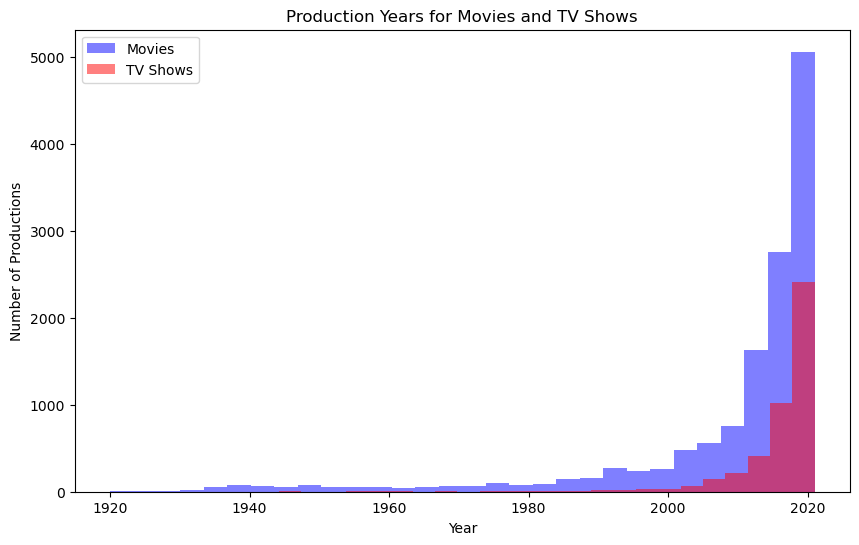

In [54]:
#Visual 1 - FILL IN

# create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# plot the histogram
ax.hist(df_nf_ap[df_nf_ap['type'] == 'Movie']['release_year'], bins=30, alpha=0.5, label='Movies', color='blue')
ax.hist(df_nf_ap[df_nf_ap['type'] == 'TV Show']['release_year'], bins=30, alpha=0.5, label='TV Shows', color='red')

# set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Productions')
ax.set_title('Production Years for Movies and TV Shows')
ax.legend()

# print the plot
plt.show()

*Answer to research question:* 2020 is the most year were the movies and tv shows released

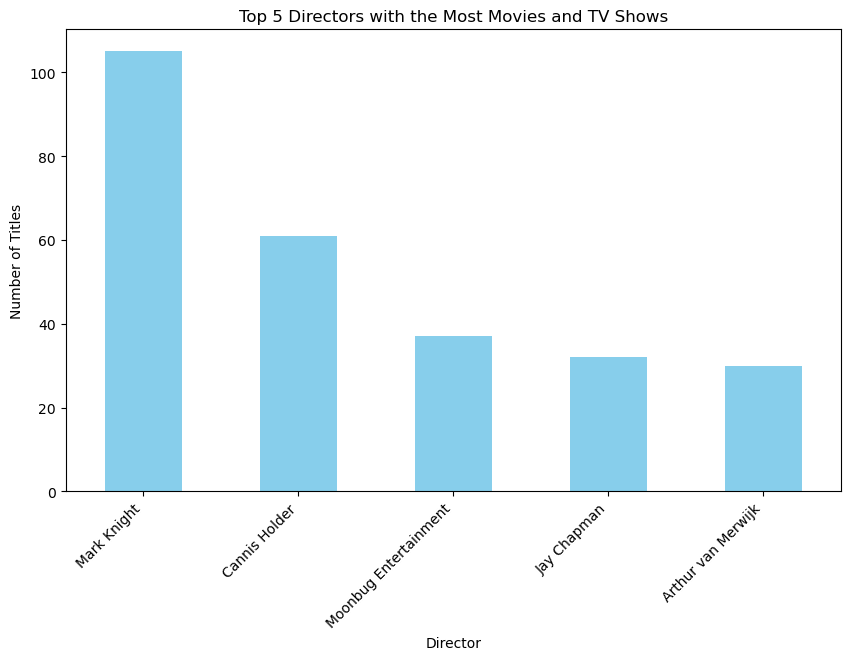

In [55]:
#Visual 2 - FILL IN

# group the data by director and count the number of movies and tv shows for each director
director_counts = df_nf_ap.groupby('director')['title'].count().sort_values(ascending=False)

# select the top 5 directors with the most movies and tv shows
top_directors = director_counts.head(5)

# create a bar plot
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')

# set labels and title
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 5 Directors with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')

# print plot
plt.show()

*Answer to research question:* 'Mark Knight' is the director who directed the most.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete this project, I'll reduce the memory usage by converting the datatypes into correct format, I'll also deal with the column 'description' to clean it.

For the questions, there are a lot of questions we can ask about this dataset, for example we can discover what is the most category for movies and tv show that is most common?, and which rating is the most common between these movies and tv shows.